# Channel Mixing (seeing in technicolor)

This notebook explores modifying the colors of an image using all of the color information from the original image.  This means that we can create each color channel value in the resulting image using the values from all of the channels present in the original image.  It also means that no information from other pixels in the image will be used to generate the output color at any pixel location.

The transformation of the input image pixel values to the output image pixel values can be summarized as a function describing each output pixel value in terms of the input image pixel values:

$$ b_{output} = f_b( b_{input}, g_{input}, r_{input} ) $$

$$ g_{output} = f_g( b_{input}, g_{input}, r_{input} ) $$

$$ r_{output} = f_r( b_{input}, g_{input}, r_{input} ) $$

Note that in the functions that we define below, we can remap the colors in-place.  That is, once we have read the values of the original image, we can replace them in the image with the result.  This is possible only because we do not use information from any other pixel to create the value for any output pixel.  If that were the case, we would need to write the remapped values to a buffer so that the original image values would be available for further processing.

As we will see below, using this technique creates some major color distortions.  So creating less obvious effects will not likely use this technique.

In [1]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt

---
The [_Technicolor Process 1_](https://en.wikipedia.org/wiki/Technicolor#Process_1) was additive and colors resemble the use of Red and Green channels, and since these colors cannot mix to gray, a Value channel is added.  The resulting colorspace has these components: RGV.

Converting a BGR image to these remapped colors replaces the Blue value of the image with the minimum of all the color channels at a pixel.  Simply removing the Blue channel would turn grays and blues yellow.

In [2]:
def Technicolor1(src,dst):
    b, g, r = cv2.split(src)
    cv2.min(b,g,b)
    cv2.min(b,r,b)
    cv2.merge((b, g, r), dst)

---
The [_Technicolor Process 2_](https://en.wikipedia.org/wiki/Technicolor#Process_2) was subtractive and the colors resemble a simple Red and Cyan color space.  Blue and Green can mix to make Cyan, so we can average these two original image colors to make the resulting output color.  We can put the Cyan value into both the Blue and Green values of the output image.

In [3]:
def Technicolor2(src,dst):
    b, g, r = cv2.split(src)
    cv2.addWeighted(b, 0.5, g, 0.5, 0, b)
    cv2.merge((b, b, r), dst)

---
CGA graphics of the 1980s were targeted to the limited color capabilities available with computer graphics at the time ([8 bit Palettes](https://en.wikipedia.org/wiki/List_of_8-bit_computer_hardware_palettes#CGA)). _CGA Palette 1_ resembles a Cyan and Magenta color space.  Since Cyan and Magenta cannot mix to gray, a Value channel is included.

Converting to this palette is similar to the _Technicolor Process 1_ conversion, but here we are removing Yellow rather than Blue.  We can do this by moving the Blue channel output to the maximum value of all channels in the input image.

In [4]:
def CGAPalette1(src,dst):
    b, g, r = cv2.split(src)
    cv2.max(b,g,b)
    cv2.max(b,r,b)
    cv2.merge((b, g, r), dst)

---
Lets read in an image in full BGR color and see what these transformations do to the image.  Here we have an image of students that includes a number of colors and includes whites and grays as well.

In [5]:
bgr_image = cv2.imread('students.jpg')
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)

Lets make a copy of the image to process using each of the above techniques.

In [6]:
tc1 = bgr_image.copy()
tc2 = bgr_image.copy()
cga = bgr_image.copy()

And now lets remap the colors of those image copies in place for each technique.

In [7]:
Technicolor1(tc1,tc1); tc1 = cv2.cvtColor(tc1, cv2.COLOR_BGR2RGB)
Technicolor2(tc2,tc2); tc2 = cv2.cvtColor(tc2, cv2.COLOR_BGR2RGB)
CGAPalette1(cga,cga);  cga = cv2.cvtColor(cga, cv2.COLOR_BGR2RGB)

---
Lets look at the results for the _Technicolor Process 1_ mapping.  The original image is on the left, with the remapped image on the right.  You can see that this retains Red and grayscale, but Blue colors turn Green and colors with Blue components become modified.

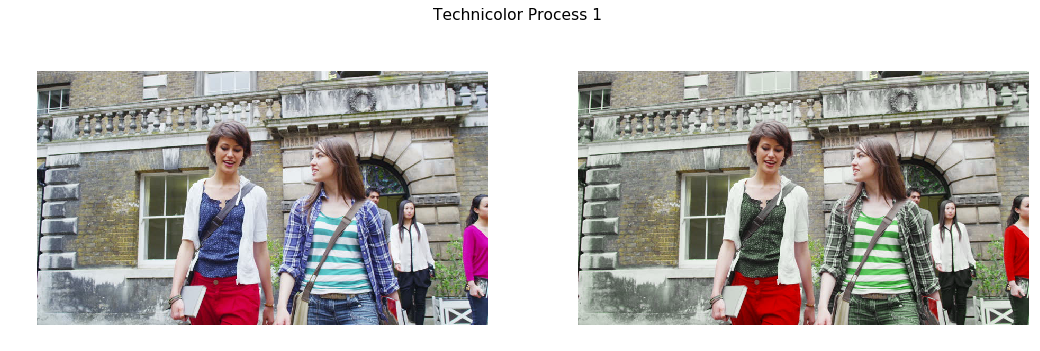

In [8]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(16.0,5.0); fig.set_dpi(80)
fig.suptitle('Technicolor Process 1',fontsize=14)

ax[0].set_axis_off();ax[1].set_axis_off()
ax[0].imshow(rgb_image); ax[1].imshow(tc1)

---
Below are the results for the _Technicolor Process 2_ mapping.  The original image is on the left, with the remapped image on the right.  You can see that this also retains Red and grayscale, but Blue colors turn Green and colors with Blue components become modified.  In some cases less obviously and in others more so.

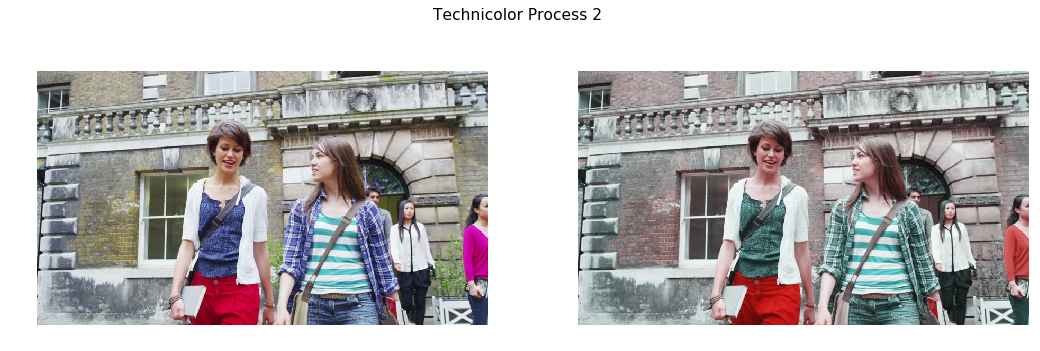

In [9]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(16.0,5.0); fig.set_dpi(80)
fig.suptitle('Technicolor Process 2',fontsize=14)

ax[0].set_axis_off();ax[1].set_axis_off()
ax[0].imshow(rgb_image); ax[1].imshow(tc2)

---
Below are the results for the _CGA Palette 1_ mapping.  The original image is on the left, with the remapped image on the right.  You can see that the removal of Yellow from the image converts many colors quite significantly.  Blues seem to be retained with only slight modifications here.

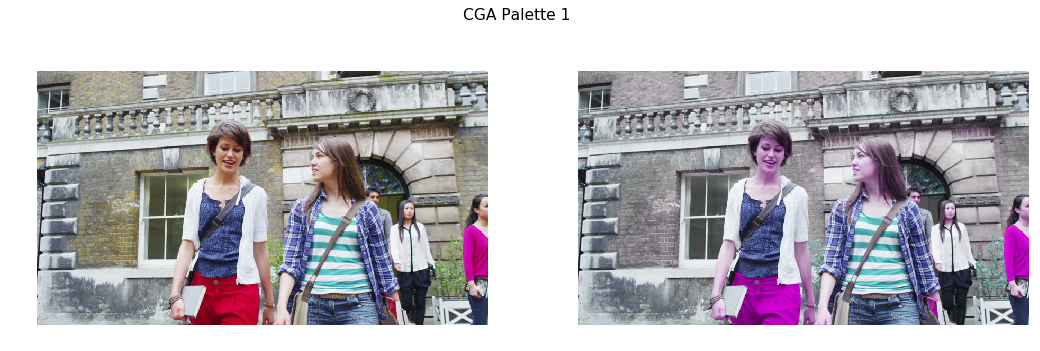

In [10]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(16.0,5.0); fig.set_dpi(80)
fig.suptitle('CGA Palette 1',fontsize=14)

ax[0].set_axis_off();ax[1].set_axis_off()
ax[0].imshow(rgb_image); ax[1].imshow(cga)